# Map showing Haro, Rosario and San Juan Channel

Based on Ben's code from: https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.cm as cma
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc

In [2]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jun18/SalishSea_1d_20180601_20180601_grid_T.nc')
jan18_sal = jan18_data['vosaline'][0,5]
jan18_sal.shape

jan18_data['vosaline']

<xarray.DataArray 'vosaline' (time_counter: 1, deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2018-06-01T12:00:00
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
Attributes:
    standard_name:  sea_water_reference_salinity
    long_name:      Reference Salinity
    units:          g kg-1

In [3]:
# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mask.tmask[0]

bathy = nc.Dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
# mesh = nc.Dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
plt.rcParams['font.size'] = 14


In [4]:
grid.nav_lat[347,292].values,grid.nav_lon[347,292].values
grid.Bathymetry[347,292].values

array(125.375)

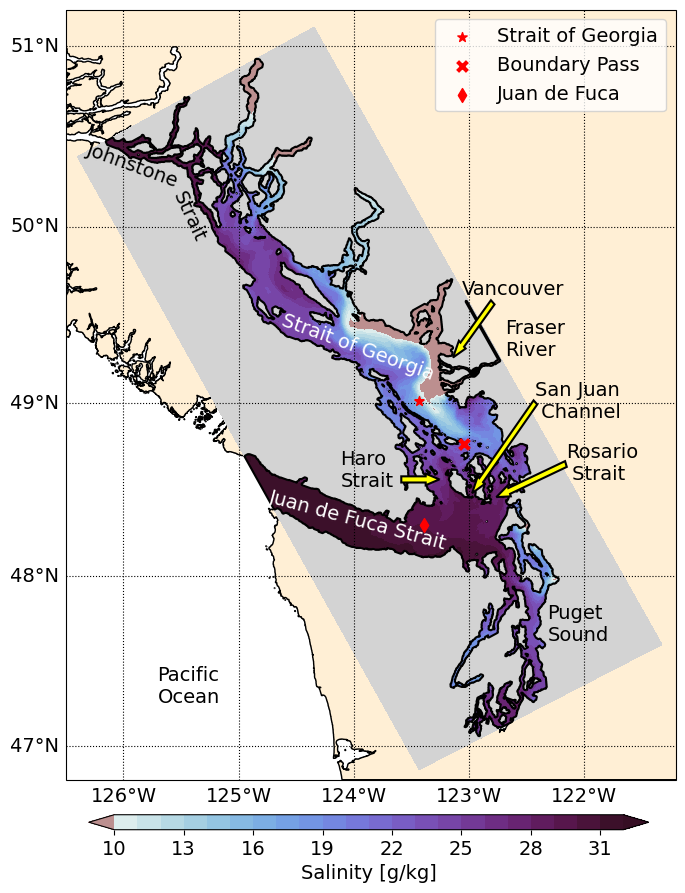

In [102]:
# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_data['vosaline'][0,0], mask=tmask[0])


cmap = cm.dense

# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='papayawhip'))

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(10, 33, 1),
    cmap=cm.dense, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15,color='w')
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20, color='w')
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.text(0.82, 0.39, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.77, 0.47, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.65, 0.63, 'Vancouver', transform=ax.transAxes)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.82, 0.41, -0.093, -0.035, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.77, 0.49, -0.089, -0.101, head_width=0.015,width=0.008,linewidth = 1.5, edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.70, 0.62, -0.05, -0.055, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)

#plot sog current meter
sog_x, sog_y = ax.projection.transform_point(-123.429, 49.013, crs.Geodetic())
ax.scatter(sog_x,sog_y,marker = '*',color='r',s=50,zorder=5,label='Strait of Georgia')

#plot bp current meter
bp_x, bp_y = ax.projection.transform_point(-123.03953, 48.7638, crs.Geodetic())
ax.scatter(bp_x,bp_y,marker='x',color='r',s=50,zorder=5,linewidths=3,label='Boundary Pass')

#plot bp current meter
jdf_x, jdf_y = ax.projection.transform_point(-123.39, 48.30074, crs.Geodetic())
ax.scatter(jdf_x,jdf_y,marker='d',color='r',s=50,zorder=5,label='Juan de Fuca')

ax.legend(facecolor='w')

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

In [91]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/salishsea_map.png',bbox_inches='tight')

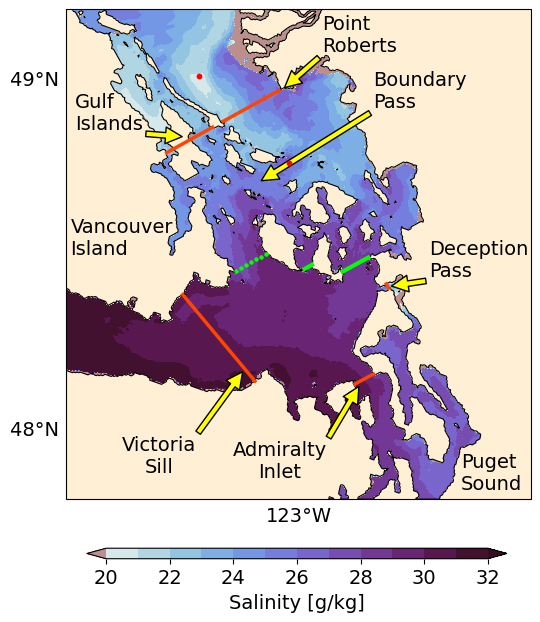

In [43]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[0])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,33,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# Plot the line on the map
ax.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
pr_end_x, pr_end_y = ax.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# Plot the line on the map
ax.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# Plot the line on the map
ax.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# Plot the line on the map
ax.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# Plot the line on the map
ax.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# Plot the line on the map
ax.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
ax.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - Haro
sjc_start_x, sjc_start_y = ax.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# # Add annotations

ax.annotate('Point\nRoberts',
            xy=(0.47, 0.84), xycoords='axes fraction',
            xytext=(0.55, 0.99), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Deception\nPass',
            xy=(0.7, 0.435), xycoords='axes fraction',
            xytext=(0.78, 0.53), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Victoria\nSill',
            xy=(0.38, 0.26), xycoords='axes fraction',
            xytext=(0.2, 0.13), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')


ax.annotate('Boundary\nPass',
            xy=(0.42, 0.65), xycoords='axes fraction',
            xytext=(0.66, 0.80), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),)

ax.annotate('Admiralty\nInlet',
            xy=(0.63, 0.23), xycoords='axes fraction',
            xytext=(0.46, 0.12), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')

ax.annotate('Gulf\nIslands',
            xy=(0.25, 0.74), xycoords='axes fraction',
            xytext=(0.02, 0.83), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

In [28]:
sog_x, sog_y

(-47756.06155031309, 6244795.736636299)

In [7]:
import pandas as pd
data_stat = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/model_evals/ObsModel/ObsModel_202111_CIOOS_gridU_20210101_20211231.csv')
lat_stat = data_stat['j']
lon_stat = data_stat['i']

lat_stat_u = lat_stat.unique()
lon_stat_u = lon_stat.unique()
lat_stat_u,lon_stat_u

(array([419]), array([263]))

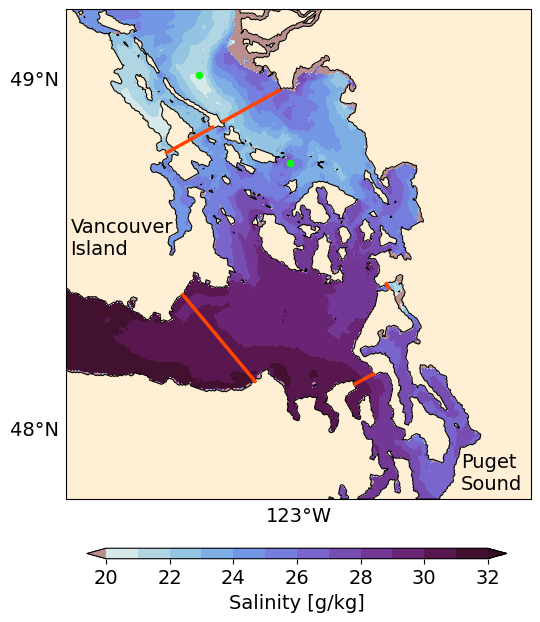

In [11]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[0])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,33,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# Plot the line on the map
ax.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
pr_end_x, pr_end_y = ax.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# Plot the line on the map
ax.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# Plot the line on the map
ax.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# Plot the line on the map
ax.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# Plot the line on the map
ax.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# Plot the line on the map
# ax.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
# ax.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - Haro
sjc_start_x, sjc_start_y = ax.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
# ax.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# for ii in range(len(lat_stat_u)):
#     p1,p2 = ax.projection.transform_point(grid.nav_lon[lat_stat_u[ii],lon_stat_u[ii]], grid.nav_lat[lat_stat_u[ii],lon_stat_u[ii]], crs.Geodetic())
#     ax.scatter(p1,p2,color='lime',zorder=3,s=20)
    
BP_lon,BP_lat = ax.projection.transform_point(grid.nav_lon[343,289], grid.nav_lat[343,289], crs.Geodetic())
ax.scatter(BP_lon,BP_lat,color='lime',zorder=3,s=20)

#IOS
BP_lon,BP_lat = ax.projection.transform_point(grid.nav_lon[419,263], grid.nav_lat[419,263], crs.Geodetic())
ax.scatter(BP_lon,BP_lat,color='lime',zorder=3,s=20)

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

In [7]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/SJGI_map_ariane_bndys.png',bbox_inches='tight')

### Thalweg plot

/ocean/cstang/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


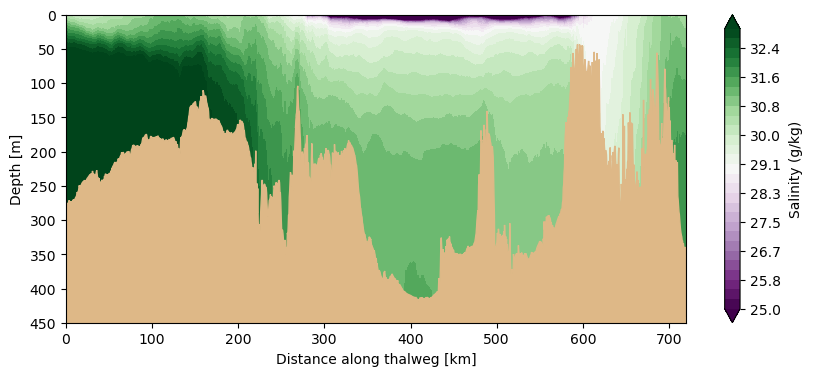

In [92]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/15jun18/SalishSea_1d_20180615_20180615_grid_T.nc')
saldata_masked = np.ma.masked_array(jan18_data['vosaline'][0,:,:],mask=tmask)

fig,ax=plt.subplots(1,1,figsize=(10,4)) 
levels = np.linspace(25,33,30)
cb=visualisations.contour_thalweg(ax,saldata_masked,bathy,mesh,clevels=levels,cmap=cma.PRGn)
cb.set_label('Salinity (g/kg)', rotation=90,labelpad=6)

ax.set_ylim((450,0))

cb.formatter.set_useOffset(False)
cb.formatter.set_scientific(False)
cb.ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

/ocean/cstang/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


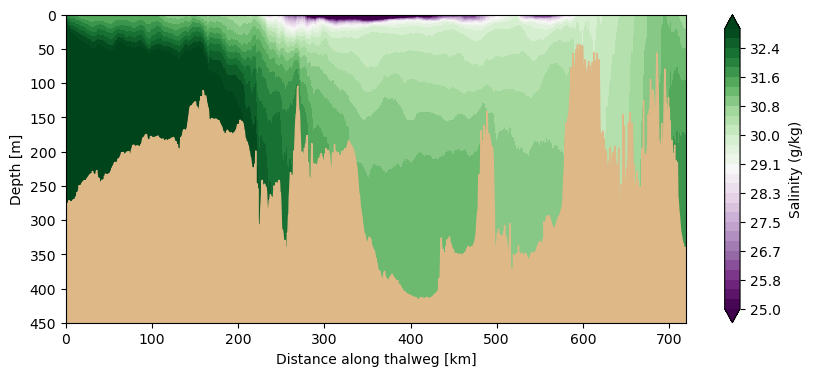

In [67]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/15jun19/SalishSea_1d_20190615_20190615_grid_T.nc')
saldata_masked = np.ma.masked_array(jan18_data['vosaline'][0,:,:],mask=tmask)

fig,ax=plt.subplots(1,1,figsize=(10,4)) 
levels = np.linspace(25,33,30)
cb=visualisations.contour_thalweg(ax,saldata_masked,bathy,mesh,clevels=levels,cmap=cma.PRGn)
cb.set_label('Salinity (g/kg)', rotation=90,labelpad=6)

ax.set_ylim((450,0))

cb.formatter.set_useOffset(False)
cb.formatter.set_scientific(False)
cb.ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

/ocean/cstang/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


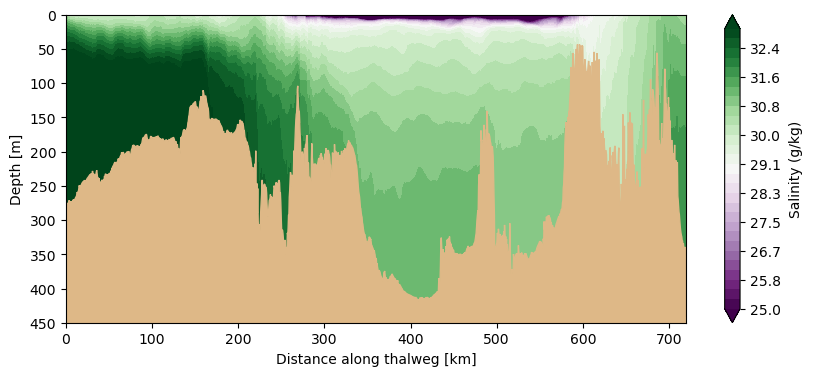

In [80]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/19jun20/SalishSea_1d_20200619_20200619_grid_T.nc')
saldata_masked = np.ma.masked_array(jan18_data['vosaline'][0,:,:],mask=tmask)

fig,ax=plt.subplots(1,1,figsize=(10,4)) 
levels = np.linspace(25,33,30)
cb=visualisations.contour_thalweg(ax,saldata_masked,bathy,mesh,clevels=levels,cmap=cma.PRGn)
cb.set_label('Salinity (g/kg)', rotation=90,labelpad=6)

ax.set_ylim((450,0))

cb.formatter.set_useOffset(False)
cb.formatter.set_scientific(False)
cb.ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

/ocean/cstang/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


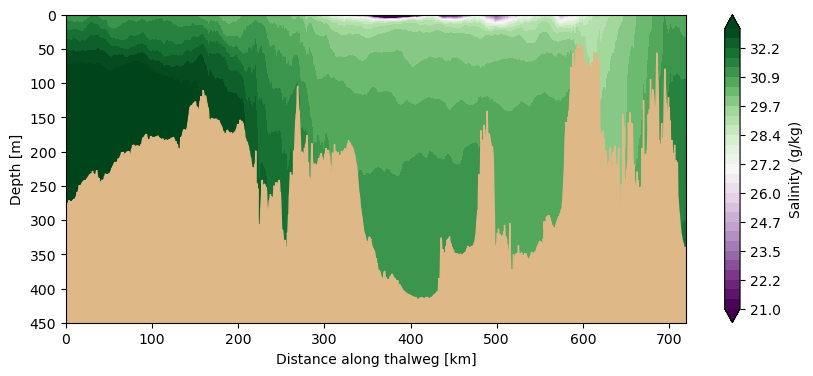

In [75]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/15jun21/SalishSea_1d_20210615_20210615_grid_T.nc')
saldata_masked = np.ma.masked_array(jan18_data['vosaline'][0,:,:],mask=tmask)

fig,ax=plt.subplots(1,1,figsize=(10,4)) 
levels = np.linspace(21,33,30)
cb=visualisations.contour_thalweg(ax,saldata_masked,bathy,mesh,clevels=levels,cmap=cma.PRGn)
cb.set_label('Salinity (g/kg)', rotation=90,labelpad=6)

ax.set_ylim((450,0))

cb.formatter.set_useOffset(False)
cb.formatter.set_scientific(False)
cb.ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

/ocean/cstang/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


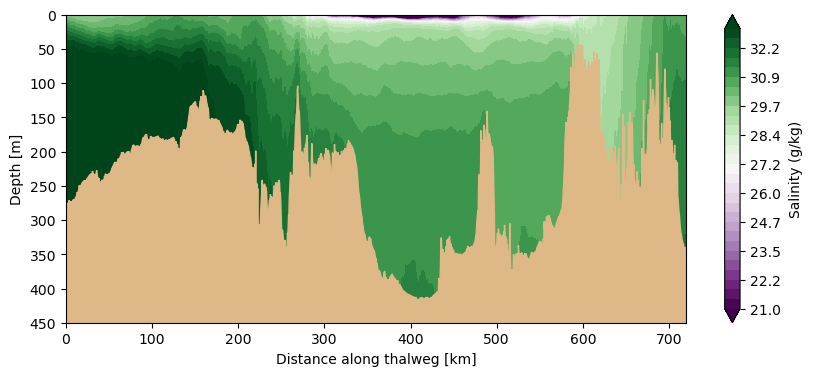

In [68]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/14jun18/SalishSea_1d_20180614_20180614_grid_T.nc')
saldata_masked = np.ma.masked_array(jan18_data['vosaline'][0,:,:],mask=tmask)

fig,ax=plt.subplots(1,1,figsize=(10,4)) 
levels = np.linspace(21,33,30)
cb=visualisations.contour_thalweg(ax,saldata_masked,bathy,mesh,clevels=levels,cmap=cma.PRGn)
cb.set_label('Salinity (g/kg)', rotation=90,labelpad=6)

ax.set_ylim((450,0))

cb.formatter.set_useOffset(False)
cb.formatter.set_scientific(False)
cb.ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

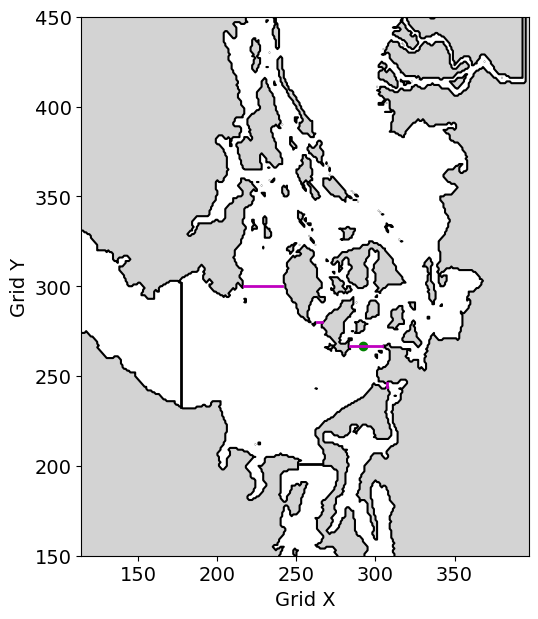

In [3]:
# Fig params
mask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

#Boundaries
vs_y = np.arange(233,303,1)
vs_x = np.linspace(177,177,len(vs_y))
adm_x = np.arange(252,267,1)
adm_y = np.linspace(201,201,len(adm_x))
dec_y = np.arange(244,247,1)
dec_x = np.linspace(307,307,len(dec_y))
ros_x = np.arange(284,305,1)
ros_y = np.linspace(267,267,len(ros_x))
sjc_x = np.arange(263,267,1)
sjc_y = np.linspace(280,280,len(sjc_x))
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))

subdomain = [114, 397, 150, 450]
fig = plt.figure(figsize=(8, 7))

ax = fig.add_subplot()
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(mask.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax.set_xlim(subdomain[:2])
ax.set_ylim(subdomain[2:])
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
ax.plot(vs_x,vs_y,color='k',lw=2)
ax.plot(adm_x,adm_y,color='k',lw=2)
ax.plot(dec_x,dec_y,color='m',lw=2)
ax.plot(ros_x,ros_y,color='m',lw=2)
ax.plot(sjc_x,sjc_y,color='m',lw=2)
ax.plot(haro_x,haro_y,color='m',lw=2)
viz_tools.set_aspect(ax)
ax.scatter(292,267,color='g')



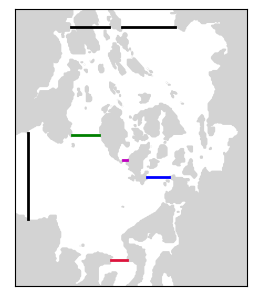

In [7]:
vs_y = np.arange(233,303,1)
vs_x = np.linspace(177,177,len(vs_y))
adm_x = np.arange(252,267,1)
adm_y = np.linspace(201,201,len(adm_x))
pr_x = np.arange(262,311,1)
pr_y = np.linspace(386,386,len(pr_x))
gulf_x = np.arange(216,251,1)
gulf_y = np.linspace(386,386,len(gulf_x))
ros_x = np.arange(284,305,1)
ros_y = np.linspace(267,267,len(ros_x))
sjc_x = np.arange(263,267,1)
sjc_y = np.linspace(280,280,len(sjc_x))
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))

subdomain = [165, 375, 180, 400]
fig,ax1 = plt.subplots(1,1,figsize=(3, 4))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
ax1.set_xticks([])
ax1.set_yticks([])
viz_tools.set_aspect(ax1);

ax1.plot(vs_x,vs_y,color='k',lw=2)
ax1.plot(adm_x,adm_y,color='crimson',lw=2)
ax1.plot(pr_x,pr_y,color='k',lw=2)
ax1.plot(gulf_x,gulf_y,color='k',lw=2)
ax1.plot(ros_x,ros_y,color='blue',lw=2)
ax1.plot(sjc_x,sjc_y,color='m',lw=2)
ax1.plot(haro_x,haro_y,color='green',lw=2)

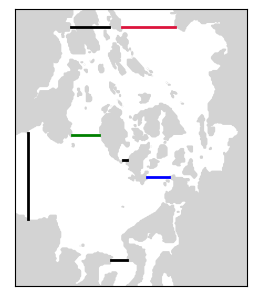

In [10]:
subdomain = [165, 375, 180, 400]
fig,ax1 = plt.subplots(1,1,figsize=(3, 4))

for attr, color in zip(['contourf', 'contour'], ['lightgray', 'lightgrey']):
    getattr(ax1, attr)(mesh.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax1.set_xlim(subdomain[:2])
ax1.set_ylim(subdomain[2:])
# [0]ax.set_xlabel('Grid X')
# [0]ax.set_ylabel('Grid Y')
ax1.set_xticks([])
ax1.set_yticks([])
viz_tools.set_aspect(ax1);

ax1.plot(vs_x,vs_y,color='k',lw=2)
ax1.plot(adm_x,adm_y,color='k',lw=2)
ax1.plot(pr_x,pr_y,color='crimson',lw=2)
ax1.plot(gulf_x,gulf_y,color='k',lw=2)
ax1.plot(ros_x,ros_y,color='blue',lw=2)
ax1.plot(sjc_x,sjc_y,color='k',lw=2)
ax1.plot(haro_x,haro_y,color='green',lw=2)

In [11]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_ros.png',bbox_inches='tight')